# Converting Voltage to Decibels

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

## Taking data

In [2]:
def mic_data():
    file = 'C:\\Users\\benja\\OneDrive\\Documents\\School\\Spring 2022\\Lab\\microphone.log'

    with open(file, 'r') as f:
        content = f.readlines()
        d, t = content.pop(0).split()[3:5] # date & time - not sure if useful
        data = []
        for line in content:
            try:
                data.append(float(line))
            except ValueError:
                ...
        avg = sum(data) / len(data)
        return avg

We ran some tests & took some data; the following code can be used to add a new row to the DataFrame:

In [3]:
"""  ADD DATA  
run = 3
vol = 65
white_db = 80.0
black_db = 80.9
ada_volts = mic_data()

new_data = {'run': [run], 'vol': [vol], 'white_db': [white_db], 'black_db': [black_db], 'ada_volts': [ada_volts]}
new_row = pd.DataFrame.from_dict(new_data)
df = pd.concat([df, new_row], ignore_index=True)
df
""";

Saving the DataFrame to a file:

In [4]:
# df.to_csv('calibration.csv', index=False)

## Using the collected data to find a curve-fitting function

Once we've taken the data, we can load the CSV file we've saved anytime we want. Let's do that now and start fitting the data.

In [5]:
df = pd.read_csv('calibration.csv')
df

,run,vol,white_db,black_db,ada_volts
0,2,1,73.9,74.8,0.846235
1,2,2,74.1,75.0,0.845227
2,2,3,74.3,75.1,0.883657
3,2,4,74.8,75.6,0.967895
4,2,5,74.9,75.8,0.944950
...,...,...,...,...,...
61,3,61,79.8,80.6,1.515711
62,3,62,79.9,80.7,1.560625
63,3,63,79.9,80.8,1.682333
64,3,64,80.0,80.8,1.683934


The first run had some messed up data where we're not getting a good voltage reading from the Adafruit. It kind of throws off the prediction equation.

In [6]:
df = df[df['run'] == 3]

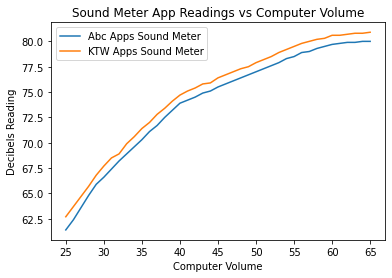

In [7]:
plt.plot(df['vol'], df['white_db'], label='Abc Apps Sound Meter')
plt.plot(df['vol'], df['black_db'], label='KTW Apps Sound Meter')
plt.xlabel('Computer Volume')
plt.ylabel('Decibels Reading')
plt.title('Sound Meter App Readings vs Computer Volume')
plt.legend()

The relationship we're interested in is finding an equation to go from voltage to decibels:

Text(0.5, 1.0, 'Adafruit Microphone Voltage vs Computer Volume')

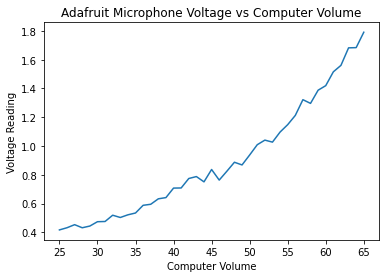

In [8]:
plt.plot(df['vol'], df['ada_volts'])
plt.xlabel('Computer Volume')
plt.ylabel('Voltage Reading')
plt.title('Adafruit Microphone Voltage vs Computer Volume')

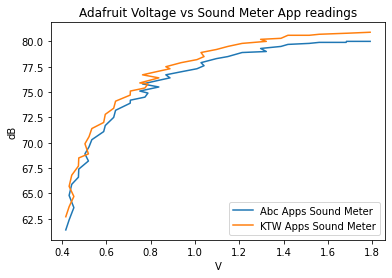

In [9]:
plt.plot(df['ada_volts'], df['white_db'], label='Abc Apps Sound Meter')
plt.plot(df['ada_volts'], df['black_db'], label='KTW Apps Sound Meter')
plt.xlabel('V')
plt.ylabel('dB')
plt.title('Adafruit Voltage vs Sound Meter App readings')
plt.legend()

We kind of expect that we're fitting a logarithmic function trying to find decibels as a function of voltage:

In [10]:
def f(x, a, b, c):
    return a * np.log(b * x) + c

In [11]:
avg_db = (df['white_db'] + df['black_db']) / 2
popt, pcov = curve_fit(f, df['ada_volts'], avg_db)

C:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The optimal values for our parameters from this data are

In [12]:
popt

array([11.51489496, 30.38881552, 37.51537308])

If you're interested, the covariances for our parameters are

In [13]:
pcov

array([[ 4.57220848e-01, -2.34573178e+06,  8.88840499e+05],
       [-2.34573183e+06,  3.67467740e+14, -1.39240442e+14],
       [ 8.88840520e+05, -1.39240442e+14,  5.27608240e+13]])

Honestly? I'm not sure it's a good fit.

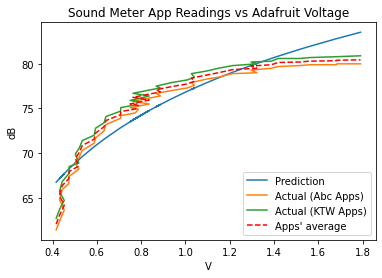

In [14]:
plt.plot(df['ada_volts'], f(df['ada_volts'], *popt), label='Prediction')
plt.plot(df['ada_volts'], df['white_db'], label='Actual (Abc Apps)')
plt.plot(df['ada_volts'], df['black_db'], label='Actual (KTW Apps)')
plt.plot(df['ada_volts'], avg_db, 'r--', label='Apps\' average')
plt.xlabel('V')
plt.ylabel('dB')
plt.title('Sound Meter App Readings vs Adafruit Voltage')
plt.legend()